# Model
Exicting part, try different types regression model.


In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle

import warnings
warnings.filterwarnings('ignore')

In [33]:
#read data, specify index so it's easier to join and search using loc
path = '../../../data/new-york-city-airbnb-open-data/'
listings_csv = os.path.join(path,'model_columns_listings.csv')
listings = pd.read_csv(listings_csv, index_col = 'id')

In [34]:
#shape
listings.shape

(27926, 47)

In [35]:
listings.columns

Index(['Unnamed: 0', 'host_since', 'host_is_superhost',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'guests_included', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'cleaning_fee_yes_no', 'security_deposit_yes_no', 'extra_people_yes_no',
       'last_review_days_ago', 'amenities_count',
       'host_response_time_one_hour', 'host_response_rate_calc',
       'host_acceptance_rate_calc', 'apt_yes_no', 'real_bed_yes_no',
       'multiple_listings', 'neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
  

In [36]:
#head
listings.head(1)

Unnamed: 0  host_since  host_is_superhost  host_identity_verified  \
id                                                                        
2595           0      733294                  0                       1   

      latitude  longitude  is_location_exact  accommodates  bathrooms  \
id                                                                      
2595  40.75362  -73.98377                  0             2        1.0   

      bedrooms  ...  neighbourhood_group_cleansed_Manhattan  \
id              ...                                           
2595       0.0  ...                                       1   

      neighbourhood_group_cleansed_Queens  \
id                                          
2595                                    0   

      neighbourhood_group_cleansed_Staten Island  room_type_Entire home/apt  \
id                                                                            
2595                                           0                          1   

      room_type_Hotel room  room_type_Private room  room_type_Shared room  \
id                                                                          
2595                     0                       0                      0   

      cancellation_policy_calc_flexible  cancellation_policy_calc_moderate  \
id                                                                           
2595                                  0                                  0   

      cancellation_policy_calc_strict  
id                                     
2595                                1  

[1 rows x 47 columns]

# Features/Target


In [37]:
X = listings[['host_since', 'host_is_superhost', 'host_identity_verified', 'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit_yes_no', 'cleaning_fee_yes_no', 'guests_included','extra_people_yes_no', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_value',
'instant_bookable', 'reviews_per_month', 'neighbourhood_group_cleansed_Bronx', 'neighbourhood_group_cleansed_Brooklyn', 
'neighbourhood_group_cleansed_Manhattan', 'neighbourhood_group_cleansed_Queens', 'neighbourhood_group_cleansed_Staten Island', 'amenities_count','host_response_time_one_hour', 'host_response_rate_calc','host_acceptance_rate_calc', 'apt_yes_no', 'real_bed_yes_no','multiple_listings', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room','cancellation_policy_calc_flexible', 'cancellation_policy_calc_moderate', 'cancellation_policy_calc_strict', 'last_review_days_ago']]

y = listings['price']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression

In [38]:
#using CV
regressor = Lasso(alpha=0.5)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

print(rmse_scores)


[53.98334893 55.13769135 57.63048211 56.91572647 54.68774545 53.38026531
 54.77243492 53.26859153 55.71953193 52.86464912]


In [39]:
pred_train = regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))


54.83604671119205
0.5616533174626401


In [40]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

56.14514229004163
0.5537626503620878


# Ridge Regression

In [41]:
#using CV
regressor = Ridge(alpha=0.5)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)
print(rmse_scores)


[53.44168774 54.66843084 57.36584355 56.55307902 54.22041884 52.91902609
 54.67205148 52.97493728 55.27308091 52.32713318]


In [42]:
pred_train = regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))


54.44156889357735
0.5683261059040501


In [43]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

55.68300141110442
0.5610785383205945


# Random Forest

In [44]:
#using CV
regressor = RandomForestRegressor(n_estimators=100, random_state=None, min_samples_split=100)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores) 
print(rmse_scores)

[49.90608526 51.84020895 53.71006383 53.94683036 51.35640041 51.58593941
 52.51775148 49.96707188 52.15066101 50.97297712]


In [45]:
pred_train= regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))

51.79539897198858
0.6739150970030091


In [46]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

52.426723586764986
0.6109127689926752


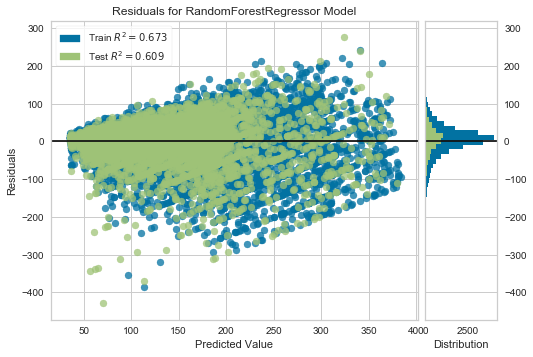

In [47]:
#chart
from yellowbrick.regressor import prediction_error, ResidualsPlot

model = RandomForestRegressor(n_estimators=100, random_state=None, min_samples_split=100)
oz = ResidualsPlot(model)

oz.fit(X_train, y_train)
oz.score(X_test, y_test)
_ = oz.show()

# Gradient Boost

In [48]:
#using CV
regressor = GradientBoostingRegressor(random_state=0)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores) 
print(rmse_scores)

[50.16305465 51.73508554 53.14988608 53.50147921 50.62052356 50.19288005
 51.90997551 49.68948388 52.23719035 49.71236314]


In [49]:
pred_train= regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))

51.29119219654268
0.6330636381567811


In [50]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

52.515986356588066
0.609586705931348


# Feature Importance
this was for gradient boosting - run the same code for random forest, make sure run the fit/model first, it uses same regessor variable

In [51]:
#get features importance
features = regressor.feature_importances_

#get column names from our list of features
column_names=X.columns.values.tolist()

#match features importance to column name
df = pd.DataFrame([features], columns=column_names)


In [52]:
df.head()

host_since  host_is_superhost  host_identity_verified  is_location_exact  \
0       0.008           0.000127                     0.0           0.000195   

   accommodates  bathrooms  bedrooms      beds  security_deposit_yes_no  \
0       0.11794   0.069972  0.103832  0.001045                 0.001539   

   cleaning_fee_yes_no  ...  real_bed_yes_no  multiple_listings  \
0              0.00071  ...              0.0           0.000022   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
0                   0.483191                   0.0                0.000526   

   room_type_Shared room  cancellation_policy_calc_flexible  \
0               0.001956                                0.0   

   cancellation_policy_calc_moderate  cancellation_policy_calc_strict  \
0                           0.000445                         0.002591   

   last_review_days_ago  
0              0.005079  

[1 rows x 42 columns]

In [53]:
#features importance sorted
features_sorted = df.iloc[0].sort_values(ascending=False)

In [54]:
features_sorted.head(60)


room_type_Entire home/apt                     0.483191
neighbourhood_group_cleansed_Manhattan        0.132143
accommodates                                  0.117940
bedrooms                                      0.103832
bathrooms                                     0.069972
guests_included                               0.018754
review_scores_rating                          0.011037
reviews_per_month                             0.008337
host_since                                    0.008000
last_review_days_ago                          0.005079
amenities_count                               0.005029
extra_people_yes_no                           0.004556
neighbourhood_group_cleansed_Brooklyn         0.003466
number_of_reviews                             0.003243
neighbourhood_group_cleansed_Queens           0.003216
apt_yes_no                                    0.003033
review_scores_cleanliness                     0.002839
review_scores_value                           0.002833
cancellati

# Using Yellowbrick to visualize

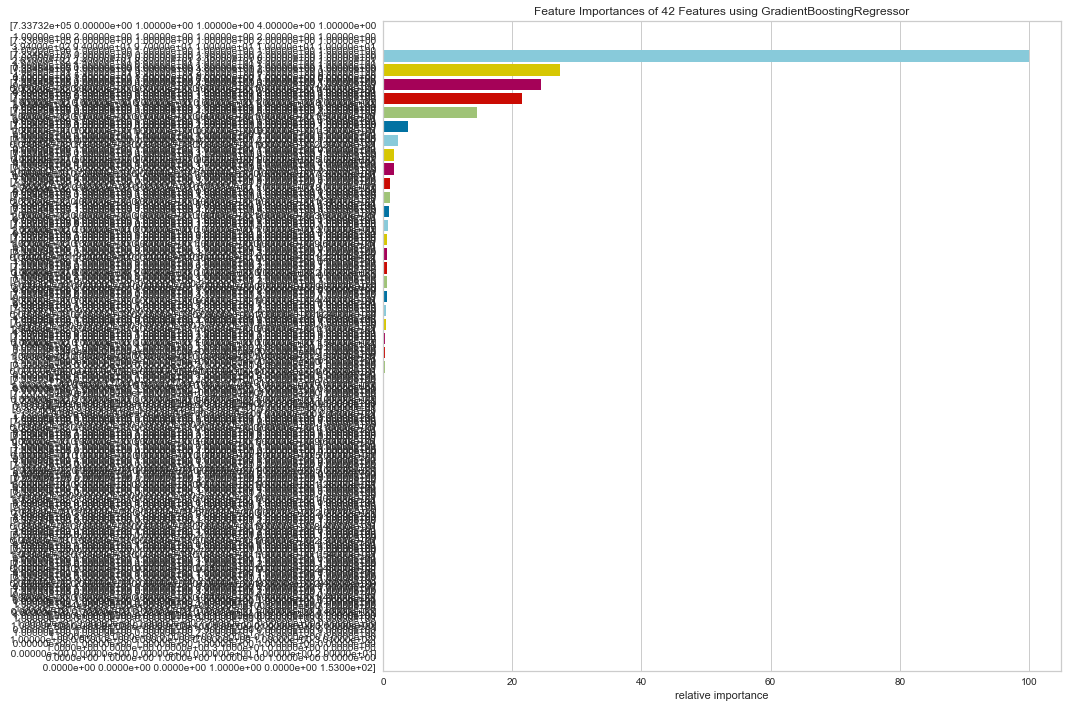

In [55]:
from yellowbrick.features import FeatureImportances

model = GradientBoostingRegressor(random_state=0)
viz = FeatureImportances(model, labels=X, size=(1080, 720))

viz.fit(X_train, y_train)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()

# Model Output for Testing Flask
Using very few features

In [56]:
X = listings[['bedrooms',
            'accommodates',
            'room_type_Entire home/apt',
            'bathrooms',
            'neighbourhood_group_cleansed_Manhattan',
            'guests_included']]

y = listings['price']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boost
For testing flask

In [57]:
#using CV
# regressor = Lasso(alpha=0.1)
# regressor = regressor.fit(X_train, y_train) 

#using CV
regressor = GradientBoostingRegressor(random_state=0)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

print(rmse_scores)

[52.24485164 54.15035709 55.86316481 55.97613252 52.83969573 52.7047136
 53.83395236 51.94158391 54.23572308 52.09814361]


In [58]:
pred_train = regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))

53.5888318345294
0.5904922882175974


In [59]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

54.628583085502896
0.5775440644295136


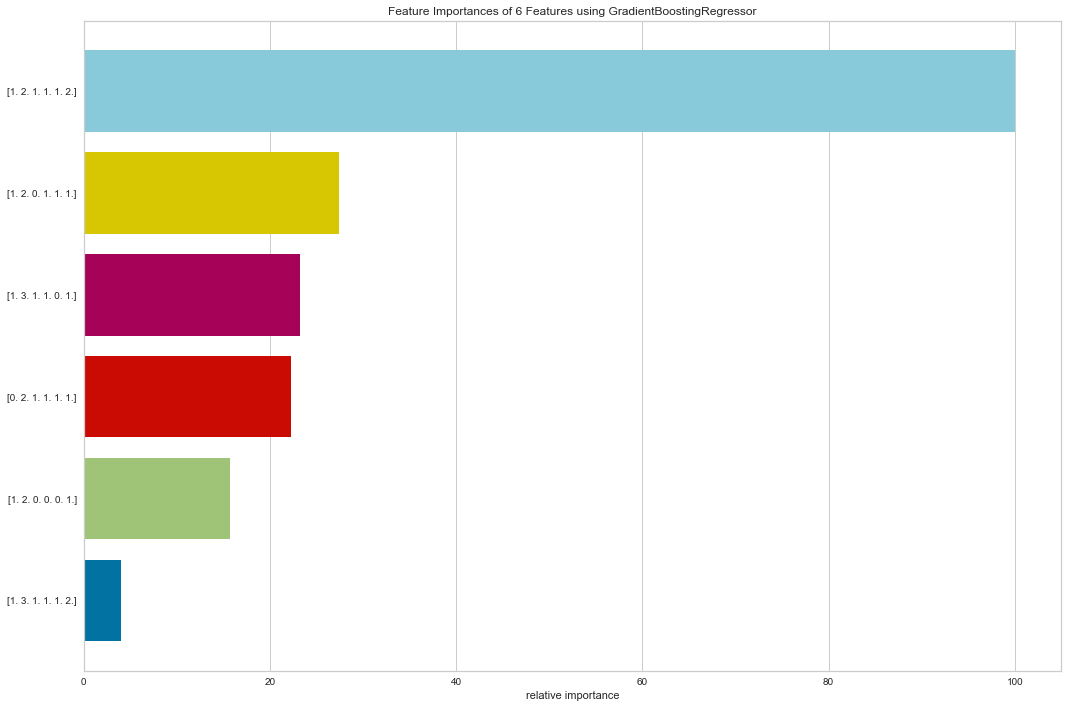

In [60]:
model = regressor = GradientBoostingRegressor(random_state=0)
viz = FeatureImportances(model, labels=X, size=(1080, 720))

viz.fit(X_train, y_train)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()

In [61]:
# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))

# Webapp

In [62]:
%%HTML

'<iframe width="700" height="600" src="http://seebeyond.pythonanywhere.com" frameborder="0" allowfullscreen></iframe>'
